=== СРАВНЕНИЕ L1 (LASSO) И L2 (RIDGE) РЕГУЛЯРИЗАЦИИ ===

ПРИМЕР 1: Веса разной величины
Исходные веса: w = [ 4.   0.8 -0.3]
Параметр регуляризации: λ = 0.5

=== L2 (Ridge) ===
Штраф: λ × Σw² = 0.5 × 16.7300 = 8.3650
Градиенты: 2λ × w = 1.0 × [ 4.   0.8 -0.3] = [ 4.   0.8 -0.3]

=== L1 (Lasso) ===
Штраф: λ × Σ|w| = 0.5 × 5.1000 = 2.5500
Субградиенты: λ × sign(w) = 0.5 × [ 1.  1. -1.] = [ 0.5  0.5 -0.5]

--- Обновление весов (learning rate = 0.1) ---
L2 обновленные веса: [ 4.   0.8 -0.3] - 0.1 × [ 4.   0.8 -0.3] = [ 3.6   0.72 -0.27]
L1 обновленные веса: [ 4.   0.8 -0.3] - 0.1 × [ 0.5  0.5 -0.5] = [ 3.95  0.75 -0.25]
------- (15 итераций) ---------
Итерация L2 веса                        L1 веса                       
----------------------------------------------------------------------
0        [ 4.   0.8 -0.3]               [ 4.   0.8 -0.3]              
1        [ 3.6   0.72 -0.27]            [ 3.95  0.75 -0.25]           
2        [ 3.24   0.648 -0.243]         [ 3.9  0.7 -0.2]     

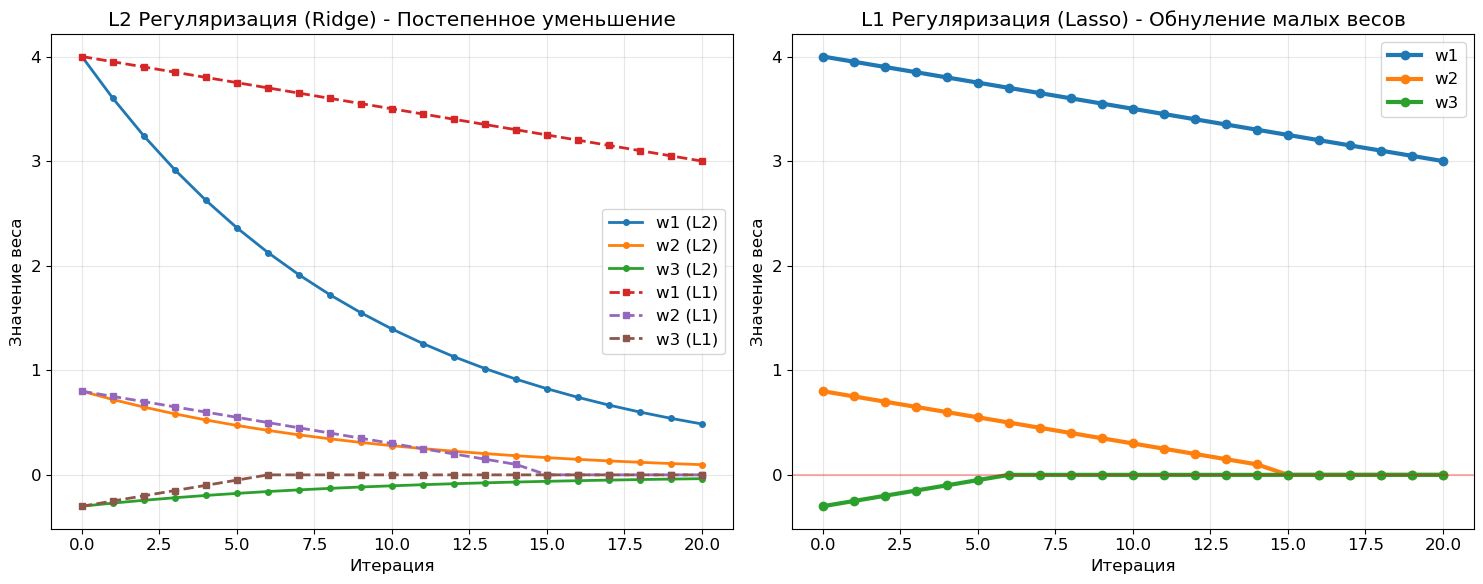


ГЕОМЕТРИЧЕСКАЯ ИНТЕРПРЕТАЦИЯ


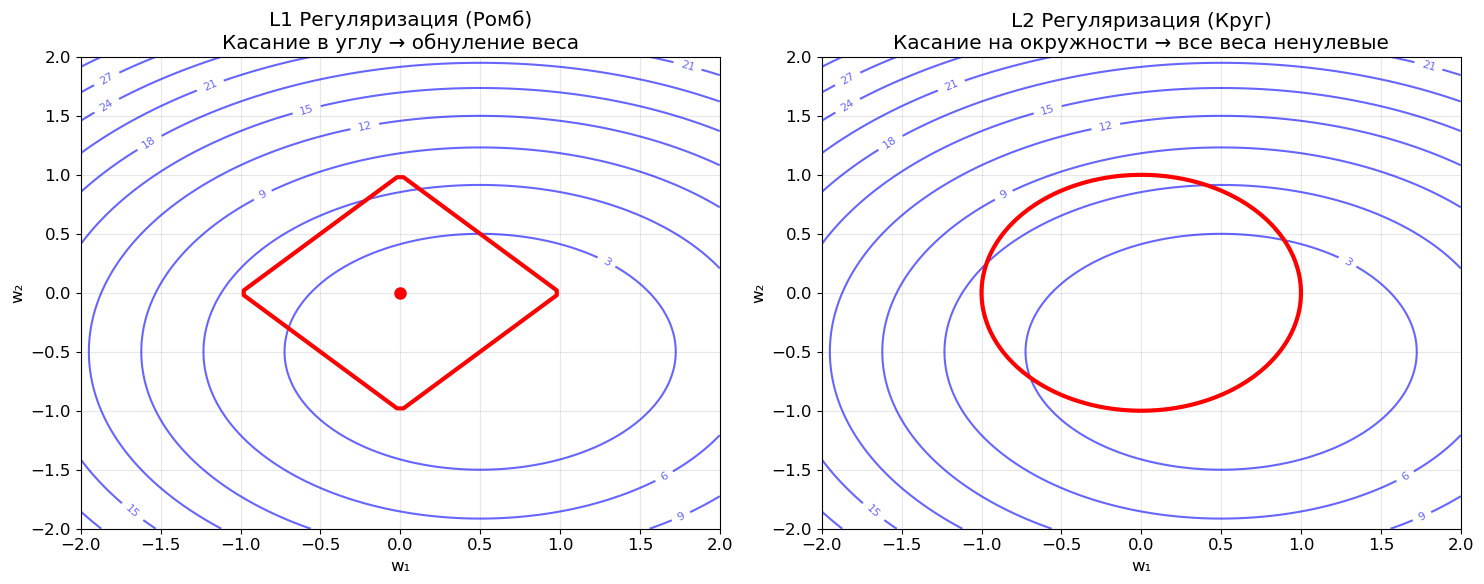

ПРАКТИЧЕСКИЙ ПРИМЕР НА СИНТЕТИЧЕСКИХ ДАННЫХ
Истинные веса:    [ 3.  -2.   0.   0.   1.5]
Lasso веса:       [ 2.5906 -1.8546 -0.      0.      1.4826]
Ridge веса:       [ 2.6897 -1.9435 -0.0021  0.015   1.5983]

Ненулевые веса в Lasso: 3 из 5
Нулевые веса в Lasso: 2 из 5


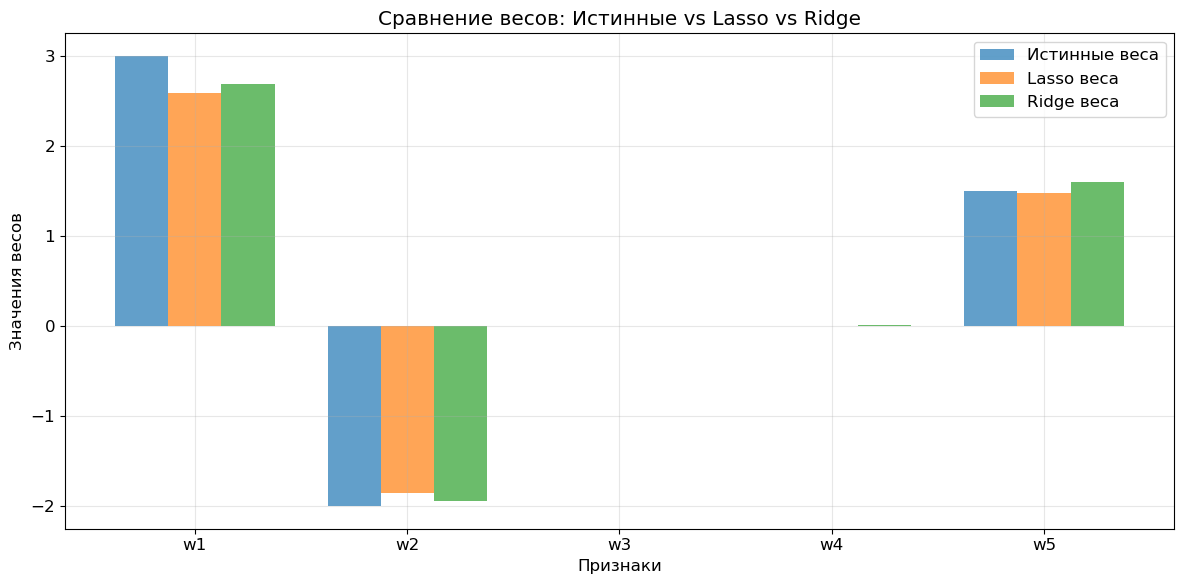

SOFT THRESHOLDING ОПЕРАТОР
λ = 0.5

z      -> S(z, λ) = sign(z) × max(|z| - λ, 0)
--------------------------------------------------
 -2.0   ->  -1.50
 -0.8   ->  -0.30
 -0.3   ->  -0.00
  0.0   ->   0.00
  0.3   ->   0.00
  0.8   ->   0.30
  2.0   ->   1.50


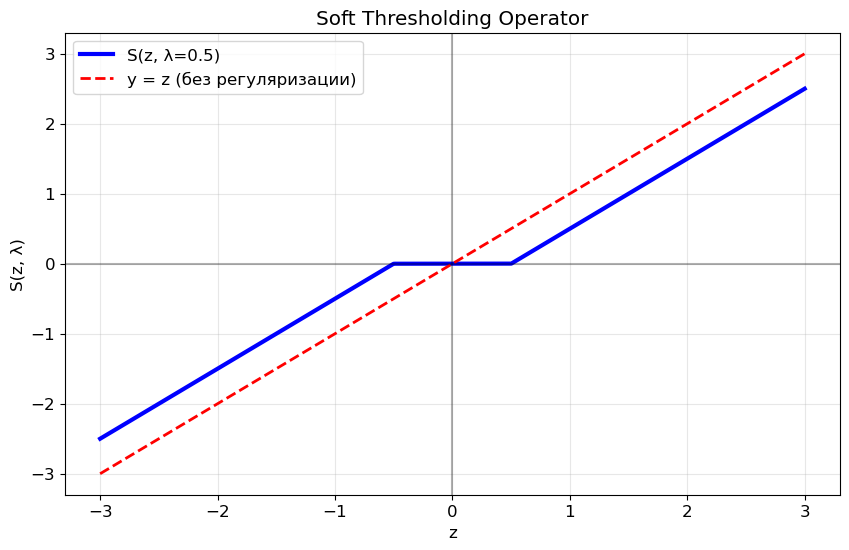


НОУТБУК ЗАВЕРШЕН!


In [3]:
# # Сравнение L1 и L2 регуляризации


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Настройки для красивого отображения графиков
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12
np.set_printoptions(precision=4, suppress=True)

print("=== СРАВНЕНИЕ L1 (LASSO) И L2 (RIDGE) РЕГУЛЯРИЗАЦИИ ===\n")

"""## 1. Демонстрация на простом примере с тремя признаками"""

def calculate_penalties_and_gradients(w, lambda_val=0.5):
    """Расчет штрафов и градиентов для L1 и L2 регуляризации"""
    
    print(f"Исходные веса: w = {w}")
    print(f"Параметр регуляризации: λ = {lambda_val}\n")
    
    # L2 регуляризация (Ridge)
    l2_penalty = lambda_val * np.sum(w**2)
    l2_gradients = 2 * lambda_val * w
    
    # L1 регуляризация (Lasso)
    l1_penalty = lambda_val * np.sum(np.abs(w))
    l1_subgradients = lambda_val * np.sign(w)
    
    print("=== L2 (Ridge) ===")
    print(f"Штраф: λ × Σw² = {lambda_val} × {np.sum(w**2):.4f} = {l2_penalty:.4f}")
    print(f"Градиенты: 2λ × w = {2 * lambda_val} × {w} = {l2_gradients}")
    
    print("\n=== L1 (Lasso) ===")
    print(f"Штраф: λ × Σ|w| = {lambda_val} × {np.sum(np.abs(w)):.4f} = {l1_penalty:.4f}")
    print(f"Субградиенты: λ × sign(w) = {lambda_val} × {np.sign(w)} = {l1_subgradients}")
    
    return l2_penalty, l2_gradients, l1_penalty, l1_subgradients

def update_weights(w, gradients, learning_rate=0.1):
    return w - learning_rate * gradients

# Пример 1: Разные по величине веса
print("ПРИМЕР 1: Веса разной величины")
print("=" * 50)

w_initial = np.array([4.0, 0.8, -0.3])
l2_penalty, l2_grads, l1_penalty, l1_subgrads = calculate_penalties_and_gradients(w_initial)

# Обновление весов
learning_rate = 0.1
w_l2_updated = update_weights(w_initial, l2_grads, learning_rate)
w_l1_updated = update_weights(w_initial, l1_subgrads, learning_rate)

print(f"\n--- Обновление весов (learning rate = {learning_rate}) ---")
print(f"L2 обновленные веса: {w_initial} - {learning_rate} × {l2_grads} = {w_l2_updated}")
print(f"L1 обновленные веса: {w_initial} - {learning_rate} × {l1_subgrads} = {w_l1_updated}")

"""## 2. Многократное обновление весов"""

def simulate_multiple_updates(w_initial, lambda_val=0.5, learning_rate=0.1, n_iterations=10):
    """Моделирование многократного обновления весов"""
    
    print(f"------- ({n_iterations} итераций) ---------")
    print("=" * 60)
    
    w_l2 = w_initial.copy()
    w_l1 = w_initial.copy()
    
    print(f"{'Итерация':<8} {'L2 веса':<30} {'L1 веса':<30}")
    print("-" * 70)
    print(f"{'0':<8} {str(w_initial):<30} {str(w_initial):<30}")
    
    for i in range(1, n_iterations + 1):
        # L2 обновление
        l2_grads = 2 * lambda_val * w_l2
        w_l2 = update_weights(w_l2, l2_grads, learning_rate)
        
        # L1 обновление
        l1_subgrads = lambda_val * np.sign(w_l1)
        w_l1 = update_weights(w_l1, l1_subgrads, learning_rate)
        
        # Soft-thresholding для L1 (имитация реального алгоритма)
        for j in range(len(w_l1)):
            if abs(w_l1[j]) < learning_rate * lambda_val:
                w_l1[j] = 0
        
        print(f"{i:<8} {str(w_l2):<30} {str(w_l1):<30}")

# Запуск симуляции
simulate_multiple_updates(w_initial, n_iterations=15)

"""## 3. Визуализация процесса обновления весов"""

def visualize_weight_updates():
    """Визуализация изменения весов во времени"""
    
    w_initial = np.array([4.0, 0.8, -0.3])
    lambda_val = 0.5
    learning_rate = 0.1
    n_iterations = 20
    
    # Симуляция
    w_l2_history = [w_initial.copy()]
    w_l1_history = [w_initial.copy()]
    
    w_l2 = w_initial.copy()
    w_l1 = w_initial.copy()
    
    for i in range(n_iterations):
        # L2 обновление
        l2_grads = 2 * lambda_val * w_l2
        w_l2 = update_weights(w_l2, l2_grads, learning_rate)
        w_l2_history.append(w_l2.copy())
        
        # L1 обновление
        l1_subgrads = lambda_val * np.sign(w_l1)
        w_l1 = update_weights(w_l1, l1_subgrads, learning_rate)
        
        # Soft-thresholding
        for j in range(len(w_l1)):
            if abs(w_l1[j]) < learning_rate * lambda_val:
                w_l1[j] = 0
                
        w_l1_history.append(w_l1.copy())
    
    w_l2_history = np.array(w_l2_history)
    w_l1_history = np.array(w_l1_history)
    
    # Построение графиков
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # L2 график
    for i in range(3):
        ax1.plot(range(n_iterations + 1), w_l2_history[:, i], 
                label=f'w{i+1} (L2)', linewidth=2, marker='o', markersize=4)
    ax1.set_title('L2 Регуляризация (Ridge) - Постепенное уменьшение')
    ax1.set_xlabel('Итерация')
    ax1.set_ylabel('Значение веса')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # L1 график
    for i in range(3):
        ax1.plot(range(n_iterations + 1), w_l1_history[:, i], 
                label=f'w{i+1} (L1)', linewidth=2, linestyle='--', marker='s', markersize=4)
    ax1.legend()
    
    # Отдельный график для L1
    for i in range(3):
        ax2.plot(range(n_iterations + 1), w_l1_history[:, i], 
                label=f'w{i+1}', linewidth=3, marker='o', markersize=6)
    ax2.set_title('L1 Регуляризация (Lasso) - Обнуление малых весов')
    ax2.set_xlabel('Итерация')
    ax2.set_ylabel('Значение веса')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.axhline(y=0, color='red', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return w_l2_history, w_l1_history

# Запуск визуализации
print("\nВИЗУАЛИЗАЦИЯ ПРОЦЕССА ОБНОВЛЕНИЯ ВЕСОВ")
print("=" * 50)
w_l2_hist, w_l1_hist = visualize_weight_updates()

"""## 4. Геометрическая интерпретация"""

def plot_regularization_geometry():
    """Геометрическая интерпретация L1 и L2 регуляризации"""
    
    # Создаем сетку для w1 и w2
    w1 = np.linspace(-2, 2, 100)
    w2 = np.linspace(-2, 2, 100)
    W1, W2 = np.meshgrid(w1, w2)
    
    # L1 и L2 ограничения
    L1_constraint = np.abs(W1) + np.abs(W2)
    L2_constraint = W1**2 + W2**2
    
    # Функция потерь (эллипс)
    loss = 2*(W1 - 0.5)**2 + 3*(W2 + 0.5)**2
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # L1 регуляризация
    contour_l1 = ax1.contour(W1, W2, loss, levels=10, colors='blue', alpha=0.6)
    contour_l1_constraint = ax1.contour(W1, W2, L1_constraint, levels=[1], colors='red', linewidths=3)
    ax1.clabel(contour_l1, inline=1, fontsize=8)
    ax1.set_title('L1 Регуляризация (Ромб)\nКасание в углу → обнуление веса')
    ax1.set_xlabel('w₁')
    ax1.set_ylabel('w₂')
    ax1.grid(True, alpha=0.3)
    ax1.plot(0, 0, 'ro', markersize=8)  # точка (0,0)
    
    # L2 регуляризация
    contour_l2 = ax2.contour(W1, W2, loss, levels=10, colors='blue', alpha=0.6)
    contour_l2_constraint = ax2.contour(W1, W2, L2_constraint, levels=[1], colors='red', linewidths=3)
    ax2.clabel(contour_l2, inline=1, fontsize=8)
    ax2.set_title('L2 Регуляризация (Круг)\nКасание на окружности → все веса ненулевые')
    ax2.set_xlabel('w₁')
    ax2.set_ylabel('w₂')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print("\nГЕОМЕТРИЧЕСКАЯ ИНТЕРПРЕТАЦИЯ")
print("=" * 40)
plot_regularization_geometry()

"""## 5. Практический пример на синтетических данных"""

def synthetic_data_example():
    """Пример на синтетических данных"""
    
    np.random.seed(42)
    n_samples, n_features = 100, 5
    
    # Генерируем данные
    X = np.random.randn(n_samples, n_features)
    
    # Создаем истинные веса (только 2 из 5 признаков важны)
    true_weights = np.array([3.0, -2.0, 0.0, 0.0, 1.5])
    y = X.dot(true_weights) + 0.1 * np.random.randn(n_samples)
    
    # Масштабируем данные
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Обучаем модели
    lasso = Lasso(alpha=0.1, max_iter=10000)
    ridge = Ridge(alpha=0.1)
    
    lasso.fit(X_scaled, y)
    ridge.fit(X_scaled, y)
    
    print("ПРАКТИЧЕСКИЙ ПРИМЕР НА СИНТЕТИЧЕСКИХ ДАННЫХ")
    print("=" * 60)
    print(f"Истинные веса:    {true_weights}")
    print(f"Lasso веса:       {lasso.coef_}")
    print(f"Ridge веса:       {ridge.coef_}")
    print(f"\nНенулевые веса в Lasso: {np.sum(lasso.coef_ != 0)} из {n_features}")
    print(f"Нулевые веса в Lasso: {np.sum(lasso.coef_ == 0)} из {n_features}")
    
    # Визуализация
    fig, ax = plt.subplots(figsize=(12, 6))
    x_pos = np.arange(len(true_weights))
    
    width = 0.25
    ax.bar(x_pos - width, true_weights, width, label='Истинные веса', alpha=0.7)
    ax.bar(x_pos, lasso.coef_, width, label='Lasso веса', alpha=0.7)
    ax.bar(x_pos + width, ridge.coef_, width, label='Ridge веса', alpha=0.7)
    
    ax.set_xlabel('Признаки')
    ax.set_ylabel('Значения весов')
    ax.set_title('Сравнение весов: Истинные vs Lasso vs Ridge')
    ax.set_xticks(x_pos)
    ax.set_xticklabels([f'w{i+1}' for i in range(n_features)])
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Запуск примера на синтетических данных
synthetic_data_example()

"""## 6. Функция Soft Thresholding"""

def demonstrate_soft_thresholding():
    """Демонстрация работы soft thresholding оператора"""
    
    def soft_threshold(z, lambda_val):
        return np.sign(z) * np.maximum(np.abs(z) - lambda_val, 0)
    
    # Тестовые значения
    test_values = np.array([-2.0, -0.8, -0.3, 0.0, 0.3, 0.8, 2.0])
    lambda_val = 0.5
    
    results = soft_threshold(test_values, lambda_val)
    
    print("SOFT THRESHOLDING ОПЕРАТОР")
    print("=" * 40)
    print(f"λ = {lambda_val}")
    print("\nz      -> S(z, λ) = sign(z) × max(|z| - λ, 0)")
    print("-" * 50)
    
    for z, result in zip(test_values, results):
        print(f"{z:5.1f}   -> {result:6.2f}")
    
    # Визуализация
    z_range = np.linspace(-3, 3, 1000)
    st_results = soft_threshold(z_range, lambda_val)
    
    plt.figure(figsize=(10, 6))
    plt.plot(z_range, st_results, 'b-', linewidth=3, label=f'S(z, λ={lambda_val})')
    plt.plot(z_range, z_range, 'r--', linewidth=2, label='y = z (без регуляризации)')
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    plt.xlabel('z')
    plt.ylabel('S(z, λ)')
    plt.title('Soft Thresholding Operator')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Демонстрация soft thresholding
demonstrate_soft_thresholding()

"""## ИТОГИ

### Ключевые различия:

1. **L2 (Ridge)**: 
   - Градиент: `2λw` (пропорционален весу)
   - Все веса уменьшаются, но не обнуляются
   - Хорошо для мультиколлинеарности

2. **L1 (Lasso)**:
   - Субградиент: `λ × sign(w)` (константа + знак)
   - Малые веса обнуляются (разреженность)
   - Автоматический отбор признаков

3. **Геометрически**:
   - L2: круг/сфера → касание на поверхности
   - L1: ромб/октаэдр → касание в углу

### Когда использовать:
- **Lasso**: когда много признаков и нужно выбрать наиболее важные
- **Ridge**: когда все признаки потенциально полезны и есть мультиколлинеарность
- **ElasticNet**: компромисс между L1 и L2
"""

print("\n" + "="*60)
print("НОУТБУК ЗАВЕРШЕН!")
print("="*60)
